### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  

[5 rows x 26 columns]

2. Investigate the dataset for missing or problematic data.

In [5]:
##understanding the data type of columns in the datasets
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
#understand the data within the numericals columsn in the dataframe
data.describe()

temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000       0.000000      0.000000  
25%             0.000000        0.000000       1.000000      0.000000  
50%             0.000000        0.000000       1.000000      1.000000  
75%             0.000000        0.000000       1.000000      1.000000  
max             1.000000        1.000000       1.000000      1.000000

In [7]:
#print unique values in each col within the dataframe

for col in data:
    print(col)
    print(data[col].unique())
    print('\n')

destination
['No Urgent Place' 'Home' 'Work']


passanger
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']


weather
['Sunny' 'Rainy' 'Snowy']


temperature
[55 80 30]


time
['2PM' '10AM' '6PM' '7AM' '10PM']


coupon
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']


expiration
['1d' '2h']


gender
['Female' 'Male']


age
['21' '46' '26' '31' '41' '50plus' '36' 'below21']


maritalStatus
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']


has_children
[1 0]


education
['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']


occupation
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Commu

In [8]:
#print count of unique values in each col within the dataframe

for col in data:
    print(col)
    print(data[col].value_counts())
    print('\n')

destination
destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64


passanger
passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64


weather
weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64


temperature
temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64


time
time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64


coupon
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


expiration
expiration
1d    7091
2h    5593
Name: count, dtype: int64


gender
gender
Female    6511
Male      6173
Name: count, dtype: int64


age
age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: c

In [9]:
#count of null values in each column - to determine how data may need to be cleaned
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [10]:
#compute the percentage of rows that are null for each column

for col in data:
    if (data[col].isna().sum() > 0):
        print(col + "(% of NaN) : ", round((data[col].isna().sum()/data[col].isna().count()* 100),2))
        

car(% of NaN) :  99.15
Bar(% of NaN) :  0.84
CoffeeHouse(% of NaN) :  1.71
CarryAway(% of NaN) :  1.19
RestaurantLessThan20(% of NaN) :  1.02
Restaurant20To50(% of NaN) :  1.49


3. Decide what to do about your missing data -- drop, replace, other...

In [11]:
#majority of the data in colum car appears to be null. It will be hard to derive inferences using this column. 
#Hence deciding to remove the column from the data. Keeping the original dataset intact and creating a new named data_clean
data_clean=data.drop(['car'], axis=1)

In [12]:
#once column car has been dropped, we still have columns - Bar, CoffeeHouse, Carryaway, RestaurantLessThan20 and Restaurant20To50 with some null values
#these are very small percentage of data, so removing them altogether will not change the inferences
data_clean = data_clean.dropna()

In [13]:
#checking the clean dataset, there are no more null values and overall we have lost 600 rows which is less than 5% of the data
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

In [14]:
#several columns in the data are of type object. Some of them may need to be converted to other datatypes for easier analysis
#age is needed for analysis later in the project. Converting to integer can help analysis

In [15]:
#check the unique values in age column. Inorder to covert age to integer some of the non integer values need to be replaced. 
#converting below 21 to 20 and 50 plus to 50 will not change the inferences from the data
data_clean['age'].value_counts()

age
21         2537
26         2399
31         1925
50plus     1732
36         1253
41         1065
46          664
below21     504
Name: count, dtype: int64

In [16]:
#changing to type string to use str.replace function
data_clean['age'] = data_clean['age'].astype(str)

In [17]:
#replace all non integer values
data_clean["age"] = data_clean["age"].str.replace("50plus","50")
data_clean["age"] = data_clean["age"].str.replace("below21","20")

In [18]:
#check all non int values have been replaced
data_clean['age'].value_counts()

age
21    2537
26    2399
31    1925
50    1732
36    1253
41    1065
46     664
20     504
Name: count, dtype: int64

In [19]:
#convert age column to integer and check the results
data_clean['age'] = data_clean['age'].astype(int)

In [20]:
data_clean['age'].value_counts()

age
21    2537
26    2399
31    1925
50    1732
36    1253
41    1065
46     664
20     504
Name: count, dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [21]:
#count of particpants who accepted the coupon

cnt_accepted = data_clean.query("Y==1")["Y"].sum()
print("count of particpants who accepted the coupon : ", cnt_accepted )

#count of total participants in the dataset
cnt_tot_particpants = data_clean['coupon'].count()
print("count of total particpants  : ", cnt_tot_particpants )

#percentage of particapants who accepted the coupon
per_accepted = (cnt_accepted/cnt_tot_particpants) * 100
print("Percentage of participants who accepted the coupon", round(per_accepted,2), "%")

count of particpants who accepted the coupon :  6877
count of total particpants  :  12079
Percentage of participants who accepted the coupon 56.93 %


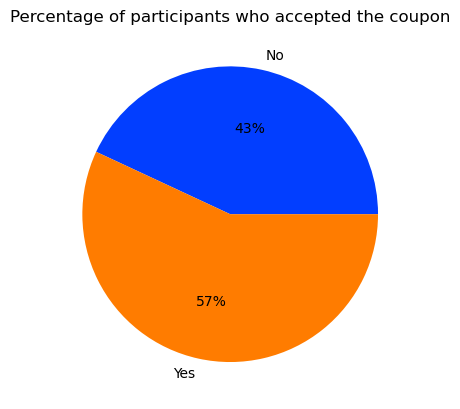

In [22]:

#visually show the split of coupon acceptance
plt.pie(data_clean.groupby("Y")["Y"].count(), labels= ["No","Yes"], colors=sns.color_palette('bright'), autopct='%.0f%%')
plt.title ("Percentage of participants who accepted the coupon")
plt.show()

5. Use a bar plot to visualize the `coupon` column.

[Text(0, 0, '2653'),
 Text(0, 0, '3816'),
 Text(0, 0, '1913'),
 Text(0, 0, '2280'),
 Text(0, 0, '1417')]

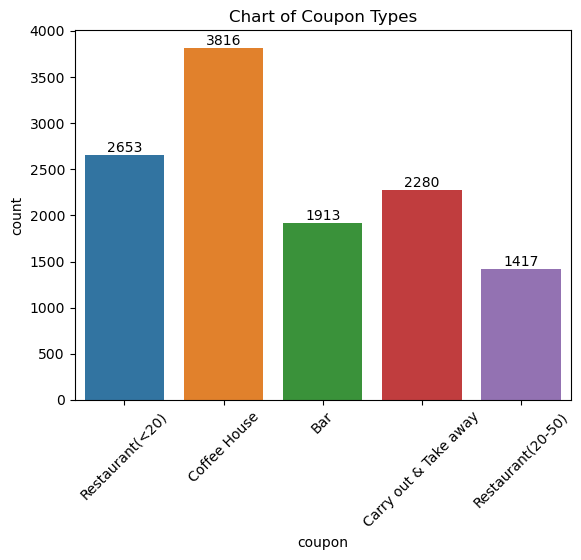

In [23]:
#show a bar chart of coupon types
coupon_chart = sns.countplot(data=data_clean, x ='coupon')
plt.title ("Chart of Coupon Types")
plt.xticks(rotation = 45)
coupon_chart.bar_label(coupon_chart.containers[0])


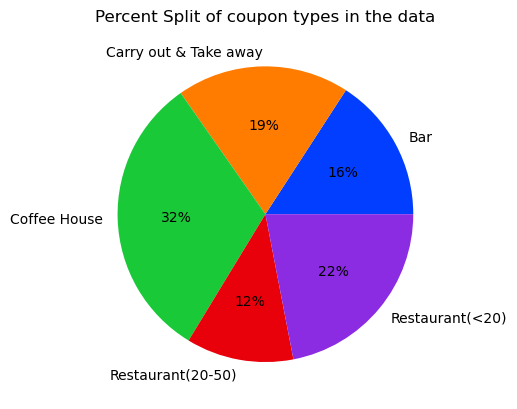

In [24]:
#visually show the percent split of coupon types
plt.pie(data_clean.groupby("coupon")["coupon"].count(), labels= data_clean.sort_values("coupon")["coupon"].unique(), colors=sns.color_palette('bright'), autopct='%.0f%%')
plt.title ("Percent Split of coupon types in the data")
plt.show()

6. Use a histogram to visualize the temperature column.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram of temperatures')

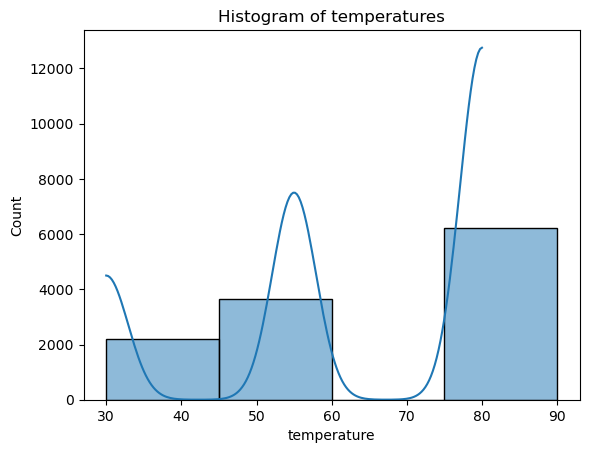

In [25]:
#simple histogram of temperature with kde to show the concentration within the bins. Each bin is of size 15 degrees

ax = sns.histplot(data_clean, x="temperature", kde=True, binwidth = 15)
plt.title ("Histogram of temperatures")


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram of temperatures split by acceptance sstatus (0 or 1)')

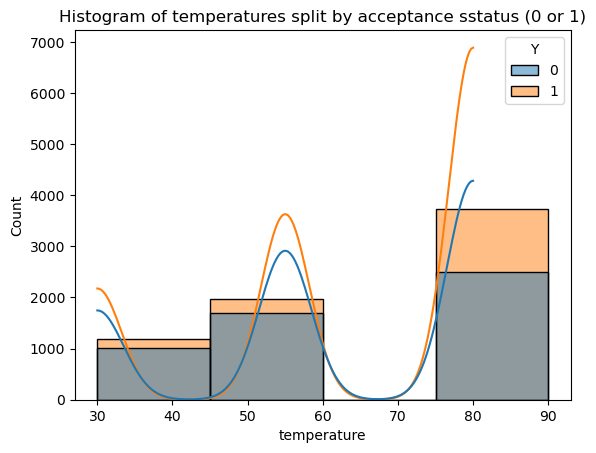

In [26]:
#Expanding on the histogram of temperature to show split by acceptance. Shows that acceptances are much higher at higher temperature 
#but the number of survery particpants is also higher at higher temperature. need to explore whether temperature has a influence on acceptance. 
ax = sns.histplot(data_clean, x="temperature", kde=True, binwidth = 15, hue="Y")
plt.title ("Histogram of temperatures split by acceptance sstatus (0 or 1)")


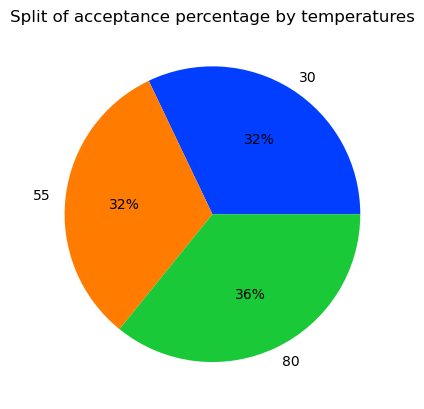

In [27]:
#pie chart to show percentage acceptance within each category of temperature. Shows that at 80 degrees, percentage of participants accepting
# the coupon are slightly higher than at lower temperatures but the difference is only marginal
plt.pie(data_clean.groupby("temperature")["Y"].sum()/data_clean.groupby("temperature")["Y"].count(), labels= data_clean.sort_values("temperature")["temperature"].unique(), colors=sns.color_palette('bright'), autopct='%.0f%%')
plt.title ("Split of acceptance percentage by temperatures")
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [28]:
#filter data only pertaining to Bar coupons
data_clean_baronly = data_clean[data_clean["coupon"]=='Bar']

In [29]:
#understanding the data in the filtered dataset
data_clean_baronly.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1913 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passanger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   int64 
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   object
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null   obj

In [30]:
#understanding the data in the filtered dataset
data_clean_baronly.describe()

temperature          age  has_children  toCoupon_GEQ5min  \
count  1913.000000  1913.000000   1913.000000            1913.0   
mean     57.613696    32.422373      0.427601               1.0   
std      17.889882    10.190618      0.494860               0.0   
min      30.000000    20.000000      0.000000               1.0   
25%      55.000000    26.000000      0.000000               1.0   
50%      55.000000    31.000000      0.000000               1.0   
75%      80.000000    41.000000      1.000000               1.0   
max      80.000000    50.000000      1.000000               1.0   

       toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  direction_opp  \
count        1913.000000        1913.000000     1913.000000    1913.000000   
mean            0.662311           0.253528        0.210141       0.789859   
std             0.473046           0.435145        0.407515       0.407515   
min             0.000000           0.000000        0.000000       0.000000   
25%             0.000000           0.000000        0.000000       1.000000   
50%             1.000000           0.000000        0.000000       1.000000   
75%             1.000000           1.000000        0.000000       1.000000   
max             1.000000           1.000000        1.000000       1.000000   

                 Y  
count  1913.000000  
mean      0.411918  
std       0.492309  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

2. What proportion of bar coupons were accepted?


In [31]:
#count of bar coupons accepted
accept_bar_coupons = data_clean_baronly.query("Y==1")["Y"].sum()
print("count of bar coupons accepted : ", accept_bar_coupons)

#total number of bar coupons in survey
total_no_bar_coupons = data_clean_baronly['coupon'].count()
print("total number of bar coupons in survey : ", total_no_bar_coupons)

#percentage of bar coupons accepted
part_rate_bar_only= accept_bar_coupons/total_no_bar_coupons * 100
print("percentage of bar coupons accepted : ", round(part_rate_bar_only,2), "%")

count of bar coupons accepted :  788
total number of bar coupons in survey :  1913
percentage of bar coupons accepted :  41.19 %


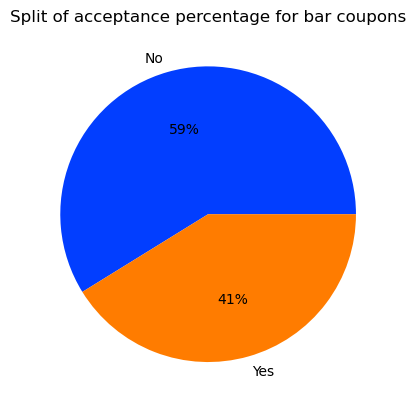

In [32]:
#pie chart to show percentage acceptancefor bar coupons
plt.pie(data_clean_baronly.groupby("Y")["Y"].count(), labels= ["No","Yes"], colors=sns.color_palette('bright'), autopct='%.0f%%')
plt.title ("Split of acceptance percentage for bar coupons")
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [33]:
data_clean_baronly['Bar'].value_counts()


Bar
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64

In [34]:
#count of acceptances for participants who went to bar 3 times or less

cnt_accept_and_bar_3x =  data_clean_baronly.query("Bar == ['1~3','less1','never']")["Y"].sum()
print("count of acceptances for participants who went to bar 3 times or less : ", cnt_accept_and_bar_3x)

#total number of participants who went to bar 3 times or less
total_part_bar_3x = data_clean_baronly.query("Bar == ['1~3','less1','never']").shape[0]
print("Total number of participants who went to bar 3 times or less : ", total_part_bar_3x)

#count of acceptances for participants who went to bar 4 times or more
cnt_accept_and_bar_more_than_4x =  data_clean_baronly.query("Bar == ['4~8','gt8']")["Y"].sum()
print("count of acceptances for participants who went to bar 4 times or more : ", cnt_accept_and_bar_more_than_4x)

#total number of participants who went to bar 4 times or more
total_part_bar_4x_more = data_clean_baronly.query("Bar == ['4~8','gt8']").shape[0]
print("Total number of participants who went to bar 4 times or more : ", total_part_bar_4x_more)

# acceptance rate for  participants who went to bar 3 times or less
accept_rate_bar_less_than_3 = (cnt_accept_and_bar_3x/total_part_bar_3x) * 100
print("Acceptance rate for those who went to a bar 3 or fewer times a month : ",round(accept_rate_bar_less_than_3,2), "%" )

# acceptance rate for  participants who went to bar 4 times or more
accept_rate_bar_more_than_4 = (cnt_accept_and_bar_more_than_4x/total_part_bar_4x_more) * 100
print("Acceptance rate for those who went to a bar 4 or more times a month : ",round(accept_rate_bar_more_than_4,2), "%" )


count of acceptances for participants who went to bar 3 times or less :  641
Total number of participants who went to bar 3 times or less :  1720
count of acceptances for participants who went to bar 4 times or more :  147
Total number of participants who went to bar 4 times or more :  193
Acceptance rate for those who went to a bar 3 or fewer times a month :  37.27 %
Acceptance rate for those who went to a bar 4 or more times a month :  76.17 %


In [39]:
fig = px.histogram(data_clean_baronly, x="Bar", y="Y", color="Y", histfunc = 'count', text_auto=True, title = "Histogram of acceptance  by category of past Bar visits (freq of bar visits)")
fig.show("svg")

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


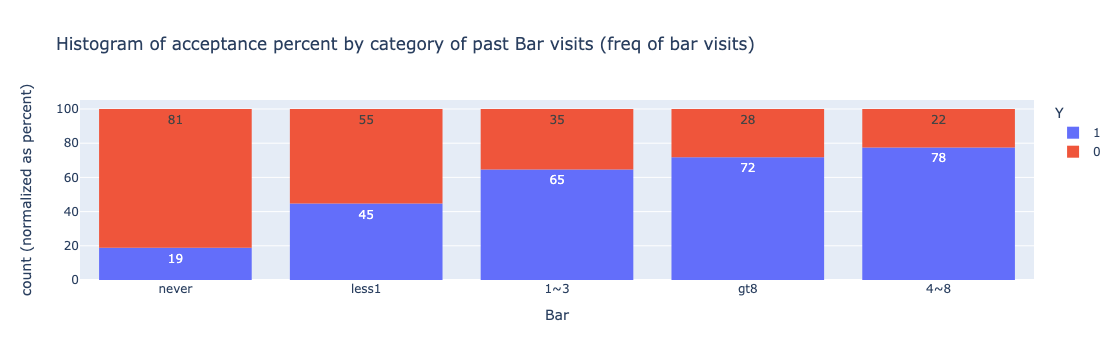

In [40]:
fig = px.histogram(data_clean_baronly, x="Bar", y="Y", color="Y", barnorm='percent', histfunc = 'count', text_auto='0.2F', title = "Histogram of acceptance percent by category of past Bar visits (freq of bar visits)")
fig.show()

In [36]:
#create dataframe group by frquency of bar visit and total number of acceptances for the cateory
data_bar_visit_summary1 = pd.DataFrame(data_clean_baronly.groupby("Bar")["Y"].sum())
#create dataframe group by frquency of bar visit and total number of participants for the cateory
data_bar_visit_summary2 = pd.DataFrame(data_clean_baronly.groupby("Bar")["Y"].count())
#merge the 2 dataframe to create table with groups - frequency of bar visit, number of acceptances for the cateory, total number of participants for the cateory
data_bar_visit_summary = pd.merge(left=data_bar_visit_summary1, right=data_bar_visit_summary2, left_on="Bar", right_on="Bar"  )
#rename the columns
data_bar_visit_summary = data_bar_visit_summary.rename(columns={"Bar": "Frequency of Bar Visit", "Y_x": "count of coupon accept", "Y_y": "count of participants"})
#Add the percentage of acceptances for each category
data_bar_visit_summary["percentbybarfreq"] = round((data_bar_visit_summary["count of coupon accept"] /data_bar_visit_summary["count of participants"] )*100,2)
print ("Summary of percent acceptance by category (freq of bar visits) :  in descending order of acceptance")
data_bar_visit_summary.sort_values("percentbybarfreq",ascending=False)


Summary of percent acceptance by category (freq of bar visits) :  in descending order of acceptance


count of coupon accept  count of participants  percentbybarfreq
Bar                                                                   
4~8                       114                    147             77.55
gt8                        33                     46             71.74
1~3                       245                    379             64.64
less1                     247                    553             44.67
never                     149                    788             18.91

In [37]:
#TAKEAWAY : the summary table and percent chart clearly shows the number of past visits to the bar directly influences the acceptance rate. Rate drastically falls if the 
#participant has not visited a bar in the past

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [38]:
#review the count of records based on frequency of bar visits
data_clean_baronly['Bar'].value_counts()

Bar
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64

In [39]:
#reviewing the count of records based on age of participants
data_clean_baronly['age'].value_counts()

age
21    397
26    368
31    324
50    273
36    196
41    171
46    103
20     81
Name: count, dtype: int64

In [40]:

# count of acceptance of participants who go more than once and over age of 25
cnt_accept_bar_1xplus_and_25plus =  data_clean_baronly.query("Bar == ['1~3','4~8','gt8'] and age > 25" )["Y"].sum()
print("count of acceptances for participants who went to bar 1 and more times and age >25 : ", cnt_accept_bar_1xplus_and_25plus)

#count of acceptance of participants who go to bar less than once or age less than 25
cnt_accept_and_NOT_bar_1xplus_or_25plus =  data_clean_baronly.query("~(Bar == ['1~3','4~8','gt8'] and age > 25)")["Y"].sum()
print("count of acceptances for participants who did not go to bar or age <=25 : ", cnt_accept_and_NOT_bar_1xplus_or_25plus)


#total count of particpants who go to bar more than once a month and over age of 25
tot_part_bar_1xplus_and_25plus =  data_clean_baronly.query("Bar == ['1~3','4~8','gt8']  and age > 25").shape[0]
print("Total # of participants who went to bar 1 or more times and age >25 : ", tot_part_bar_1xplus_and_25plus)


#total count of particpants who go to bar less than once or age less than 25
tot_part_NOT_bar_1xplus_or_25plus =  data_clean_baronly.query("~(Bar == ['1~3','4~8','gt8']  and age > 25)").shape[0]
print("Total # of participants who did not go to bar or age <=25 : ", tot_part_NOT_bar_1xplus_or_25plus)


#acceptance rate among participants who go more than once and over age of 25
accept_rate_bar_1x_and_25plus = (cnt_accept_bar_1xplus_and_25plus/tot_part_bar_1xplus_and_25plus)*100
print("Acceptance rate for those who went to bar 1 or more times and age > 25 : ",round(accept_rate_bar_1x_and_25plus,2), "%" )

#acceptance rate among participants who go to bar less than once or age less than 25
accept_rate_not_bar_1xplus_or_25plus = (cnt_accept_and_NOT_bar_1xplus_or_25plus/tot_part_NOT_bar_1xplus_or_25plus)*100
print("Acceptance rate for those who who did not go to bar or age <=25 : ",round(accept_rate_not_bar_1xplus_or_25plus,2), "%" )


count of acceptances for participants who went to bar 1 and more times and age >25 :  278
count of acceptances for participants who did not go to bar or age <=25 :  510
Total # of participants who went to bar 1 or more times and age >25 :  403
Total # of participants who did not go to bar or age <=25 :  1510
Acceptance rate for those who went to bar 1 or more times and age > 25 :  68.98 %
Acceptance rate for those who who did not go to bar or age <=25 :  33.77 %


In [41]:
#filter for only participants with age > 25
data_clean_baronly_25plus = data_clean_baronly.query("age>25")

#count of participants with age>25
print("count of participants with age>25 : ", data_clean_baronly_25plus.shape[0])

#create dataframe group by frquency of bar visit and total number of acceptances for the cateory
data_bar_visit_summary1 = pd.DataFrame(data_clean_baronly_25plus.groupby("Bar")["Y"].sum())
#create dataframe group by frquency of bar visit and total number of participants for the cateory
data_bar_visit_summary2 = pd.DataFrame(data_clean_baronly_25plus.groupby("Bar")["Y"].count())
#merge the 2 dataframe to create table with groups - frequency of bar visit, number of acceptances for the cateory, total number of participants for the cateory
data_bar_visit_summary = pd.merge(left=data_bar_visit_summary1, right=data_bar_visit_summary2, left_on="Bar", right_on="Bar"  )
#rename the columns
data_bar_visit_summary = data_bar_visit_summary.rename(columns={"Bar": "Frequency of Bar Visit", "Y_x": "count of coupon accept", "Y_y": "count of participants"})
#Add the percentage of acceptances for each category
data_bar_visit_summary["percentbybarfreq"] = round((data_bar_visit_summary["count of coupon accept"] /data_bar_visit_summary["count of participants"] )*100,2)
print ("Summary of percent acceptance by category (freq of bar visits) for partipants > age 25 :  in descending order of acceptance")
data_bar_visit_summary.sort_values("percentbybarfreq",ascending=False)


count of participants with age>25 :  1435
Summary of percent acceptance by category (freq of bar visits) for partipants > age 25 :  in descending order of acceptance


count of coupon accept  count of participants  percentbybarfreq
Bar                                                                   
4~8                        81                    103             78.64
gt8                        21                     30             70.00
1~3                       176                    270             65.19
less1                     180                    437             41.19
never                      96                    595             16.13

In [42]:
#filter for only participants with age less than 25
data_clean_baronly_not_25plus = data_clean_baronly.query("age<=25")

#count of participants with age<=25
print("count of participants with age<=25 : ", data_clean_baronly_not_25plus.shape[0])

#create dataframe group by frquency of bar visit and total number of acceptances for the cateory
data_bar_visit_summary1 = pd.DataFrame(data_clean_baronly_not_25plus.groupby("Bar")["Y"].sum())
#create dataframe group by frquency of bar visit and total number of participants for the cateory
data_bar_visit_summary2 = pd.DataFrame(data_clean_baronly_not_25plus.groupby("Bar")["Y"].count())
#merge the 2 dataframe to create table with groups - frequency of bar visit, number of acceptances for the cateory, total number of participants for the cateory
data_bar_visit_summary = pd.merge(left=data_bar_visit_summary1, right=data_bar_visit_summary2, left_on="Bar", right_on="Bar"  )
#rename the columns
data_bar_visit_summary = data_bar_visit_summary.rename(columns={"Bar": "Frequency of Bar Visit", "Y_x": "count of coupon accept", "Y_y": "count of participants"})
#Add the percentage of acceptances for each category
data_bar_visit_summary["percentbybarfreq"] = round((data_bar_visit_summary["count of coupon accept"] /data_bar_visit_summary["count of participants"] )*100,2)
print ("Summary of percent acceptance by category (freq of bar visits) for partipants <= age 25 :  in descending order of acceptance")
data_bar_visit_summary.sort_values("percentbybarfreq",ascending=False)

count of participants with age<=25 :  478
Summary of percent acceptance by category (freq of bar visits) for partipants <= age 25 :  in descending order of acceptance


count of coupon accept  count of participants  percentbybarfreq
Bar                                                                   
4~8                        33                     44             75.00
gt8                        12                     16             75.00
1~3                        69                    109             63.30
less1                      67                    116             57.76
never                      53                    193             27.46

In [43]:
#TAKEAWAY : after comparing the rate of acceptance among partipants over the age of 25 and less
# Participants who have visited a bar atleast once and age >25 have higher rate of acceptance compared to all others
# Participants past visit to bar is strongly correlated to coupon acceptances
# comparing the percentages for the group age >25 and age <=25, it is inonclusive if age itself is a major factor for acceptance

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [44]:
#review the count of records based on type of passengers travelling with the driver
data_clean_baronly['passanger'].value_counts()

passanger
Alone        1141
Friend(s)     318
Partner       260
Kid(s)        194
Name: count, dtype: int64

In [45]:
#count of acceptance from participants who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
cnt_accept_bar_1plus__No_kid_Not_Occu_FFF = data_clean_baronly.query("Bar == ['1~3','4~8','gt8'] and ~(passanger =='Kid(s)') and ~(occupation =='Farming Fishing & Forestry')" )["Y"].sum()
print("count of acceptance from participants who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry : ", cnt_accept_bar_1plus__No_kid_Not_Occu_FFF)

#Total number of participants who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
tot_part_bar_1plus__No_kid_Not_Occu_FFF= data_clean_baronly.query("Bar == ['1~3','4~8','gt8'] and ~(passanger =='Kid(s)') and ~(occupation =='Farming Fishing & Forestry')").shape[0]
print("Total number of participants who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry : ", tot_part_bar_1plus__No_kid_Not_Occu_FFF)

#Acceptance rate of participants who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
accept_rate_bar_No_kid_Not_Occu_FFF = (cnt_accept_bar_1plus__No_kid_Not_Occu_FFF/tot_part_bar_1plus__No_kid_Not_Occu_FFF) *100
print("Acceptance rate of participants who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry : ", accept_rate_bar_No_kid_Not_Occu_FFF, "%")

count of acceptance from participants who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry :  376
Total number of participants who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry :  530
Acceptance rate of participants who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry :  70.94339622641509 %


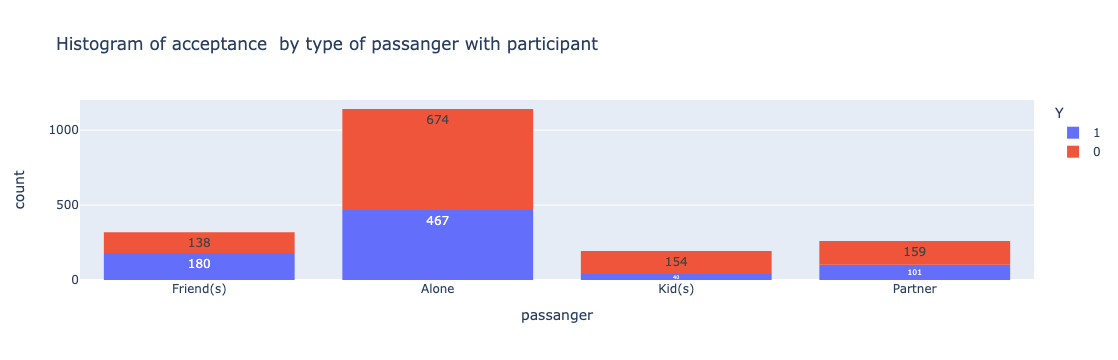

In [46]:
fig = px.histogram(data_clean_baronly, x="passanger", y="Y", color="Y",  histfunc = 'count', text_auto=True, title = "Histogram of acceptance  by type of passanger with participant")
fig.show()

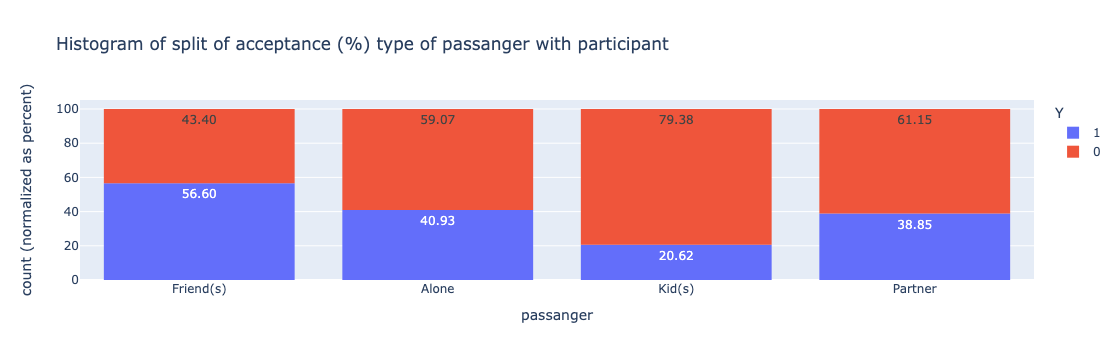

In [47]:
fig = px.histogram(data_clean_baronly, x="passanger", y="Y", color="Y", barnorm='percent', histfunc = 'count', text_auto='.2f', title = "Histogram of split of acceptance (%) type of passanger with participant")
fig.show()

In [48]:
#TAKEAWAY : Participants travelling with friends have a higher percentage of acceptance and kids have the lowest

In [49]:
#review the count of records based on driver occupation
#data_clean_baronly['occupation'].value_counts()

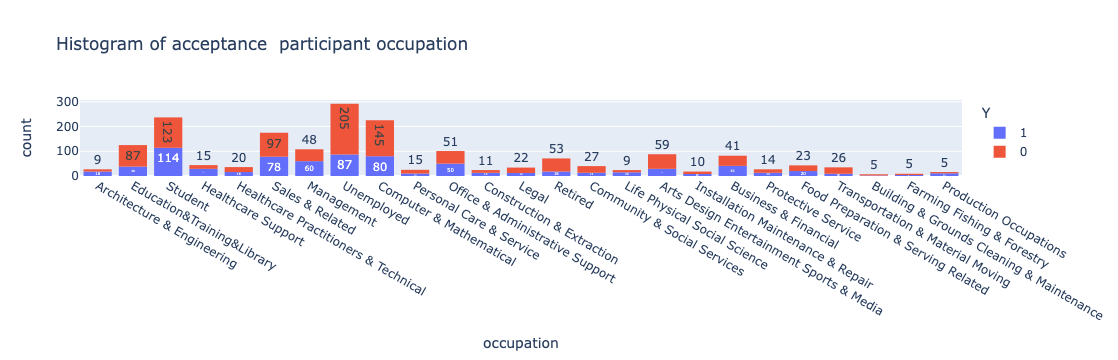

In [50]:
fig = px.histogram(data_clean_baronly, x="occupation", y="Y", color="Y", histfunc = 'count', text_auto=True, title = "Histogram of acceptance  participant occupation")
fig.show()

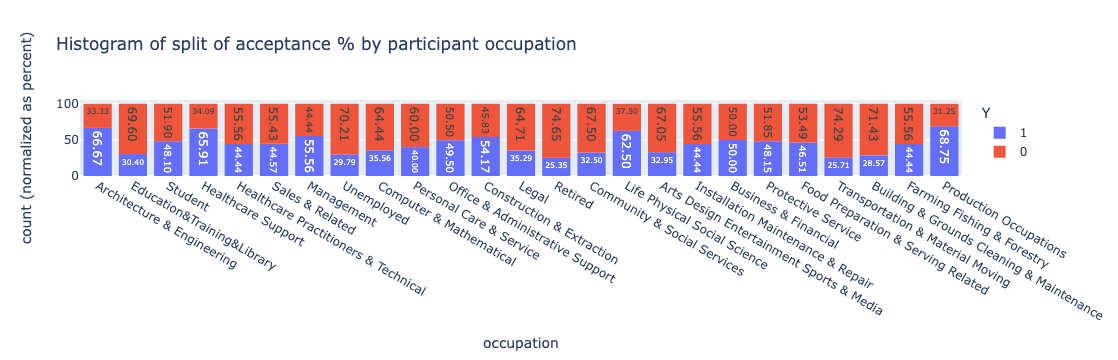

In [51]:
fig = px.histogram(data_clean_baronly, x="occupation", y="Y", color="Y", barnorm='percent', histfunc = 'count', text_auto='.2f', title = "Histogram of split of acceptance % by participant occupation")
fig.show()

In [52]:
#TAKESWAY : Based on the analysis of top 4 occupation of the participants, Unemployed participants have a lower acceptance rate. 
# No, other major differerences in acceptance rates based on occupation (the occupations which show higher percentage have very small
#sizes to derive inferences)

In [53]:
#count of acceptance from participants who go to bars more than once a month and had passengers that were not a kid 
cnt_accept_bar_1plus__No_kid = data_clean_baronly.query("Bar == ['1~3','4~8','gt8'] and ~(passanger =='Kid(s)')" )["Y"].sum()
print("count of acceptance from participants who go to bars more than once a month and had passengers that were not a kid : ", cnt_accept_bar_1plus__No_kid)

#Total number of participants who go to bars more than once a month and had passengers that were not a kid
tot_part_bar_1plus__No_kid= data_clean_baronly.query("Bar == ['1~3','4~8','gt8'] and ~(passanger =='Kid(s)')").shape[0]
print("Total number of participants who go to bars more than once a month and had passengers that were not a kid : ", tot_part_bar_1plus__No_kid)

#Acceptance rate of participants who go to bars more than once a month and had passengers that were not a kid
accept_rate_bar_No_kid = (cnt_accept_bar_1plus__No_kid/tot_part_bar_1plus__No_kid) *100
print("Acceptance rate of participants who go to bars more than once a month and had passengers that were not a kid : ", accept_rate_bar_No_kid, "%")


count of acceptance from participants who go to bars more than once a month and had passengers that were not a kid :  376
Total number of participants who go to bars more than once a month and had passengers that were not a kid :  530
Acceptance rate of participants who go to bars more than once a month and had passengers that were not a kid :  70.94339622641509 %


In [54]:
#count of acceptance from participants who go to bars more than once a month and had passengers that were not a kid and had occupation not unemployed.
cnt_accept_bar_1plus__No_kid_Not_unemp = data_clean_baronly.query("Bar == ['1~3','4~8','gt8'] and ~(passanger =='Kid(s)') and ~(occupation =='Unemployed')" )["Y"].sum()
print("count of acceptance from participants who go to bars more than once a month and had passengers that were not a kid and had occupations other Unemployed : ", cnt_accept_bar_1plus__No_kid_Not_unemp)

#Total number of participants who go to bars more than once a month and had passengers that were not a kid and had occupations other than unemployed.
tot_part_bar_1plus__No_kid_Not_Occu_unemp= data_clean_baronly.query("Bar == ['1~3','4~8','gt8'] and ~(passanger =='Kid(s)') and ~(occupation =='Unemployed')").shape[0]
print("Total number of participants who go to bars more than once a month and had passengers that were not a kid and had occupations other than unemployed : ", tot_part_bar_1plus__No_kid_Not_Occu_unemp)

#Acceptance rate of participants who go to bars more than once a month and had passengers that were not a kid and had occupations other than unemployed.
accept_rate_bar_No_kid_Not_Occu_unemp = (cnt_accept_bar_1plus__No_kid_Not_unemp/tot_part_bar_1plus__No_kid_Not_Occu_unemp) *100
print("Acceptance rate of participants who go to bars more than once a month and had passengers that were not a kid and had occupations other than unemployed : ", accept_rate_bar_No_kid_Not_Occu_unemp, "%")


count of acceptance from participants who go to bars more than once a month and had passengers that were not a kid and had occupations other Unemployed :  319
Total number of participants who go to bars more than once a month and had passengers that were not a kid and had occupations other than unemployed :  459
Acceptance rate of participants who go to bars more than once a month and had passengers that were not a kid and had occupations other than unemployed :  69.49891067538127 %


In [55]:
#TAKEAWAY : Acceptance percetage is higher with passengers travelling without Kids. Occupation of the passenger did not have much impact on the percetages. 

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [56]:
data_clean_baronly['maritalStatus'].value_counts()

maritalStatus
Married partner      833
Single               638
Unmarried partner    352
Divorced              73
Widowed               17
Name: count, dtype: int64

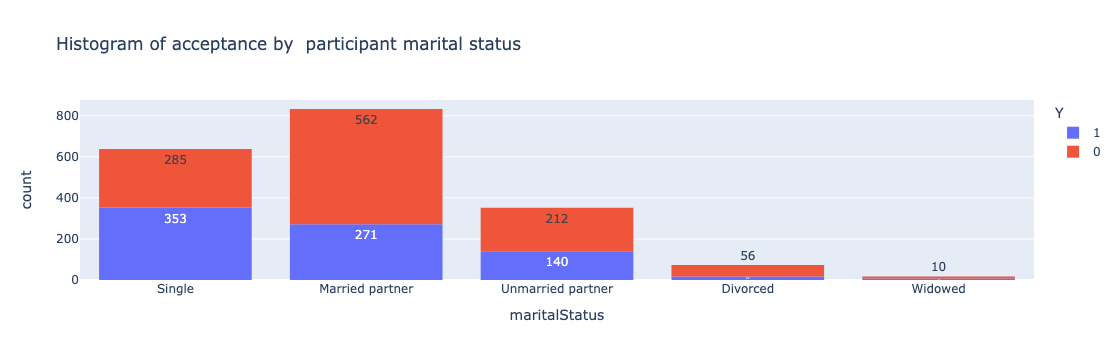

In [57]:
fig = px.histogram(data_clean_baronly, x="maritalStatus", y="Y", color="Y", histfunc = 'count', text_auto=True, title = "Histogram of acceptance by  participant marital status")
fig.show()

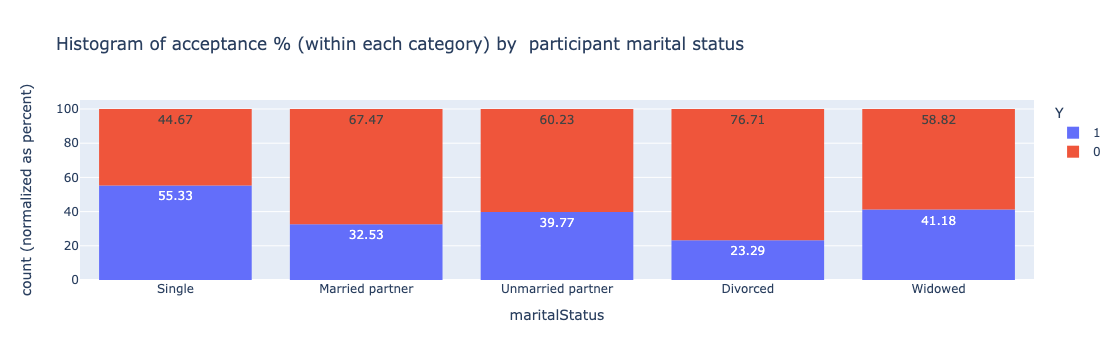

In [58]:
fig = px.histogram(data_clean_baronly, x="maritalStatus", y="Y", color="Y", barnorm='percent', histfunc = 'count', text_auto='.2f', title = "Histogram of acceptance % (within each category) by  participant marital status")
fig.show()

In [59]:
#Takeaway : acceptance among single is higher than average. acceptance among windows is close to tthe average for indviduals accepting bar coupons
# also the number of windowed participants is not material (sample size) to draw inferences. Hence removing windows paripants should only 
# marginally change the acceptance

In [60]:
#count of acceptance for partipants with more than 1 bar visits, passenger not kids and martial status not widow
cnt_accept_bar_1plus_No_kid_Not_widowed = data_clean_baronly.query("Bar == ['1~3','4~8','gt8'] and ~(passanger =='Kid(s)') and ~(maritalStatus =='Widowed')" )["Y"].sum()
print("count of acceptance for partipants with more than 1 bar visits, passenger not kids and martial status not widow : ", cnt_accept_bar_1plus_No_kid_Not_widowed)


#Total count of acceptance for partipants with more than 1 bar visits, passenger not kids and martial status not widow
total_partc_bar_1plus_No_kid_Not_widowed = data_clean_baronly.query("Bar == ['1~3','4~8','gt8'] and ~(passanger =='Kid(s)') and ~(maritalStatus =='Widowed')").shape[0]
print("total count of partipants with more than 1 bar visits, passenger not kids and martial status not widow : ", total_partc_bar_1plus_No_kid_Not_widowed)

# acceptance percent for partipants with more than 1 bar visits, passenger not kids and martial status not widow
accept_rate_bar_No_kid_Not_widowed = (cnt_accept_bar_1plus_No_kid_Not_widowed/total_partc_bar_1plus_No_kid_Not_widowed)*100
print("Acceptance rate among partipants with more than 1 bar visits, passenger not kids and martial status not widow : ", round(accept_rate_bar_No_kid_Not_widowed,2))


count of acceptance for partipants with more than 1 bar visits, passenger not kids and martial status not widow :  376
total count of partipants with more than 1 bar visits, passenger not kids and martial status not widow :  530
Acceptance rate among partipants with more than 1 bar visits, passenger not kids and martial status not widow :  70.94


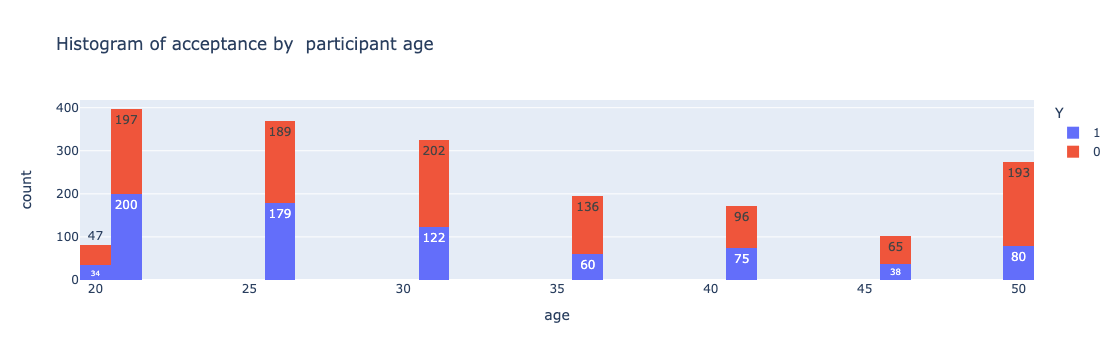

In [61]:
fig = px.histogram(data_clean_baronly, x="age", y="Y", color="Y", histfunc = 'count', text_auto=True, title = "Histogram of acceptance by  participant age")
fig.show()

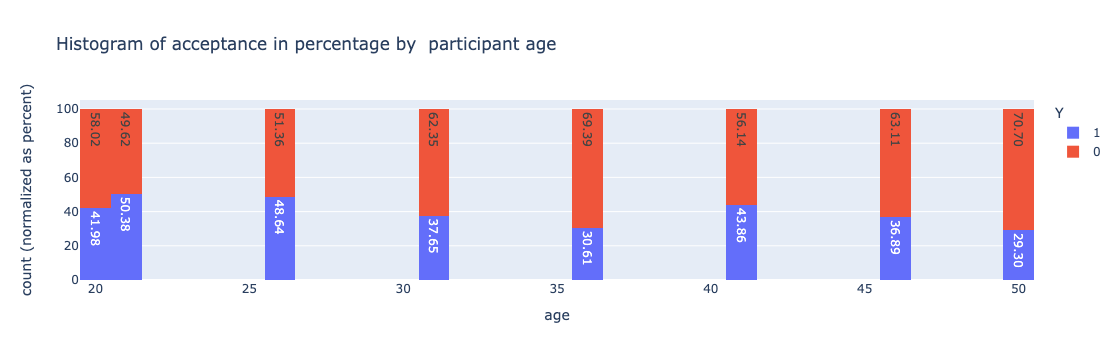

In [62]:
fig = px.histogram(data_clean_baronly, x="age", y="Y", color="Y", barnorm='percent', histfunc = 'count', text_auto='.2f', title = "Histogram of acceptance in percentage by  participant age")
fig.show()

In [63]:
#count of acceptance where for partipants with more than 1 bar visits and age <30
cnt_accept_bar_1plus_age_under_30 = data_clean_baronly.query("Bar == ['1~3','4~8','gt8'] and age < 30" )["Y"].sum()
print("count of acceptance where for partipants with more than 1 bar visits and age <30 : ", cnt_accept_bar_1plus_age_under_30)


#total count of partipants with more than 1 bar visits  and age <30
tot_part_bar_1plus_age_under_30 = data_clean_baronly.query("Bar == ['1~3','4~8','gt8'] and age < 30").shape[0]
print("count of partcipants with more than 1 bar visits  and age <30 : ", tot_part_bar_1plus_age_under_30)

#acceptance percentage for partipants with more than 1 bar visits
accept_rate_bar_1plus_under_30 = (cnt_accept_bar_1plus_age_under_30/tot_part_bar_1plus_age_under_30)*100
print("Acceptance percentage for partcipants with more than 1 bar visits and age <30 : ", round(accept_rate_bar_1plus_under_30,2), "%")

count of acceptance where for partipants with more than 1 bar visits and age <30 :  236
count of partcipants with more than 1 bar visits  and age <30 :  328
Acceptance percentage for partcipants with more than 1 bar visits and age <30 :  71.95 %


In [64]:
data_clean_baronly['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      839
4~8      548
less1    312
gt8      186
never     28
Name: count, dtype: int64

In [65]:
data_clean_baronly['income'].value_counts()

income
$25000 - $37499     300
$100000 or More     282
$12500 - $24999     271
$50000 - $62499     249
$37500 - $49999     247
Less than $12500    159
$75000 - $87499     143
$87500 - $99999     133
$62500 - $74999     129
Name: count, dtype: int64

In [66]:
#percentage acceptance rate by income levels
print(round((data_clean_baronly.groupby('income')["Y"].sum()/data_clean_baronly.groupby('income')["Y"].count())*100,2))

income
$100000 or More     47.87
$12500 - $24999     42.07
$25000 - $37499     45.33
$37500 - $49999     36.44
$50000 - $62499     40.56
$62500 - $74999     35.66
$75000 - $87499     37.76
$87500 - $99999     29.32
Less than $12500    45.91
Name: Y, dtype: float64


In [67]:
#TAKEAWAY :  income levels doesnt appear to have a major influence on bar coupon acceptance 
#(acceptance level close to the average for the bar coupon acceptance which is 41%)

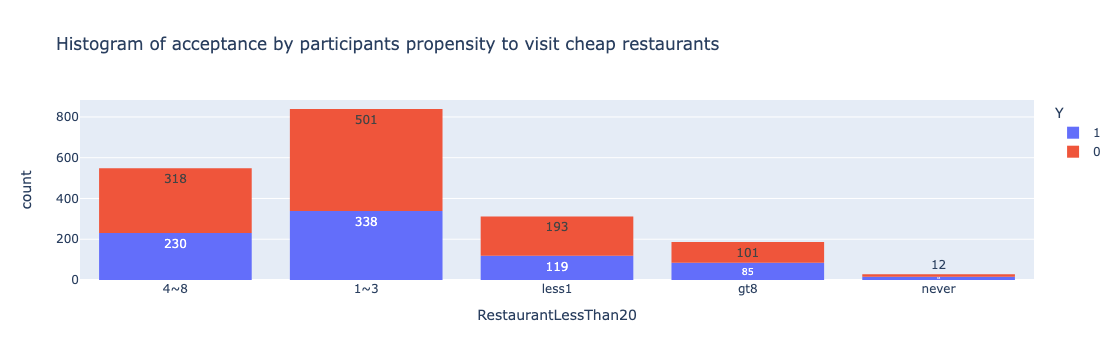

In [68]:
fig = px.histogram(data_clean_baronly, x="RestaurantLessThan20", y="Y", color="Y", histfunc = 'count', text_auto=True, title = "Histogram of acceptance by participants propensity to visit cheap restaurants")
fig.show()

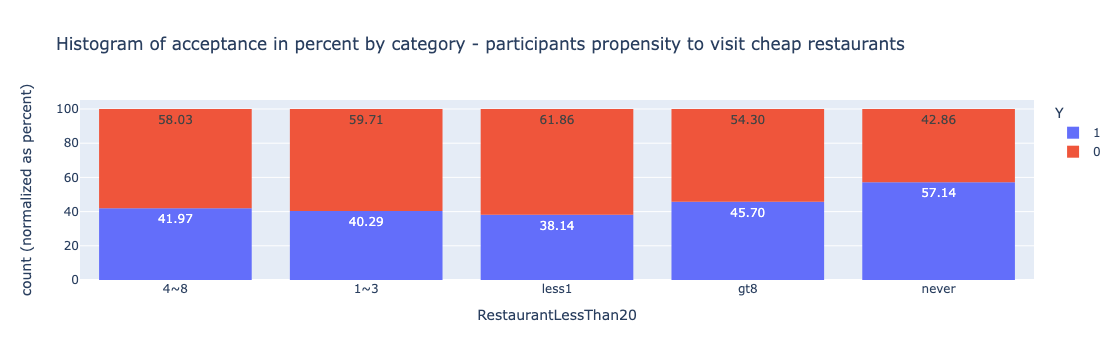

In [69]:
fig = px.histogram(data_clean_baronly, x="RestaurantLessThan20", y="Y", color="Y", barnorm='percent', histfunc = 'count', text_auto='.2f', title = "Histogram of acceptance in percent by category - participants propensity to visit cheap restaurants")
fig.show()

In [70]:
#TAKEAWAY :  participants who never visited a cheap restaurent has a higher acceptance percentage but the sample size is too small 
#to derive any inference

In [71]:
#count of acceptance where for partipants who visited cheap restaurent more than 4 times and income less than 50K
cnt_accept_cheap_rest_4plus_and_inc_50kminus = data_clean_baronly.query("RestaurantLessThan20 == ['4~8','gt8'] and income== ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']")["Y"].sum()
print("count of acceptance where for partipants who visited cheap restaurent more than 4 times and income less than 50K : ", cnt_accept_cheap_rest_4plus_and_inc_50kminus)


#total count of partipants  who visited cheap restaurent more than 4 times and income less than 50K
tot_part_cheap_rest_4plus_and_inc_50kminus = data_clean_baronly.query("RestaurantLessThan20 == ['4~8','gt8'] and income== ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']").shape[0]
print("count of partipants who visited cheap restaurent more than 4 times and income less than 50K : ", tot_part_cheap_rest_4plus_and_inc_50kminus)

#acceptance percentage for partipants with more than 1 bar visits
accept_rate_cheap_rest_than_4_and_Inc_50k_less = (cnt_accept_cheap_rest_4plus_and_inc_50kminus/tot_part_cheap_rest_4plus_and_inc_50kminus)*100
print("Acceptance percentage for partipants who visited cheap restaurent more than 4 times and income less than 50K : ", round(accept_rate_cheap_rest_than_4_and_Inc_50k_less,2), "%")


count of acceptance where for partipants who visited cheap restaurent more than 4 times and income less than 50K :  152
count of partipants who visited cheap restaurent more than 4 times and income less than 50K :  333
Acceptance percentage for partipants who visited cheap restaurent more than 4 times and income less than 50K :  45.65 %


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Specifically for Bar coupons (sample of 1913 coupons), we analysed the following attributes to assess the propensity of accepting the Bar coupons 
* **User Attributes** - Age, Marital status, Occupation, Income, how frequently visited bars in the past, how frequently visited cheap restaurents in the past
* **Contextual attributes** - Type of passesnger with the driver

**Considering some of the attributes independently** (without considering the impact of other factors jointly ), some of these attributes increases chances of accepting the Bar coupons
* **number of times driver has visited bar in the past** : Drivers with atleast 1 past visit show a higher percentage of acceptance (higher if the driver has visited 4 or more times)
* **Age of the drive** : Drivers below the age of 30 have a higer chance of accepting the Bar coupons
* **Type of passenger** : Participants travelling with friends have a higher percentage of acceptance and kids have the lowest
* **Occupation** : Unemployed passengers have a lower chance of accepting the Bar coupons. No other major differerences in acceptance rates based on occupation (the occupations which show higher percentage have very small sizes to derive inferences)

Following attributes, **did not appear to influence the chances of acceptance of bar coupons**
* **Income** : income levels doesnt appear to have a major influence on bar coupon acceptance (acceptance level close to the average for the bar coupon acceptance which is 41%)
* **how frequently visited cheap restaurents in the past** : participants who never visited a cheap restaurent has a higher acceptance percentage but the sample size is too small to derive any inference

Some of the **attributes together** can futher improve the chances of acceptance
* Participants with atleast 1 past visit and age less than 30


Earlier we assesed the impact of temperature on all types of coupons 
* Temperature - No material impact on the chances of acceptances


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [72]:
#filter data only pertaining to coffeehouse coupons
data_clean_coffeehouse = data_clean[data_clean["coupon"]=='Coffee House']

In [73]:
#understanding the data in the filtered dataset
data_clean_coffeehouse.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3816 entries, 23 to 12681
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3816 non-null   object
 1   passanger             3816 non-null   object
 2   weather               3816 non-null   object
 3   temperature           3816 non-null   int64 
 4   time                  3816 non-null   object
 5   coupon                3816 non-null   object
 6   expiration            3816 non-null   object
 7   gender                3816 non-null   object
 8   age                   3816 non-null   int64 
 9   maritalStatus         3816 non-null   object
 10  has_children          3816 non-null   int64 
 11  education             3816 non-null   object
 12  occupation            3816 non-null   object
 13  income                3816 non-null   object
 14  Bar                   3816 non-null   object
 15  CoffeeHouse           3816 non-null   obj

In [74]:
#count of coffee house coupons accepted
accept_coffehse_coupons = data_clean_coffeehouse.query("Y==1")["Y"].sum()
print("count of coffee house coupons accepted : ", accept_coffehse_coupons)

#total number of coffee house coupons in survey
total_no_coffehse_coupons = data_clean_coffeehouse['coupon'].count()
print("total number of coffee house coupons in survey : ", total_no_coffehse_coupons)

#percentage of bar coupons accepted
part_rate_coffehse_only= accept_coffehse_coupons/total_no_coffehse_coupons * 100
print("percentage of coffee house coupons accepted : ", round(part_rate_coffehse_only,2), "%")

count of coffee house coupons accepted :  1894
total number of coffee house coupons in survey :  3816
percentage of coffee house coupons accepted :  49.63 %


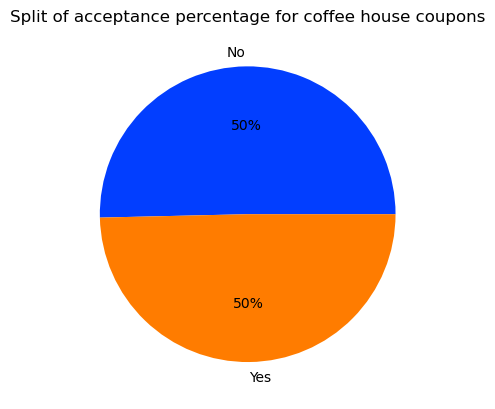

In [75]:
#pie chart to show percentage acceptancefor bar coupons
plt.pie(data_clean_coffeehouse.groupby("Y")["Y"].count(), labels= ["No","Yes"], colors=sns.color_palette('bright'), autopct='%.0f%%')
plt.title ("Split of acceptance percentage for coffee house coupons")
plt.show()

In [76]:
#Review the data in the column 'Coffee House'
data_clean_coffeehouse['CoffeeHouse'].value_counts()


CoffeeHouse
less1    1052
1~3      1019
never     896
4~8       507
gt8       342
Name: count, dtype: int64

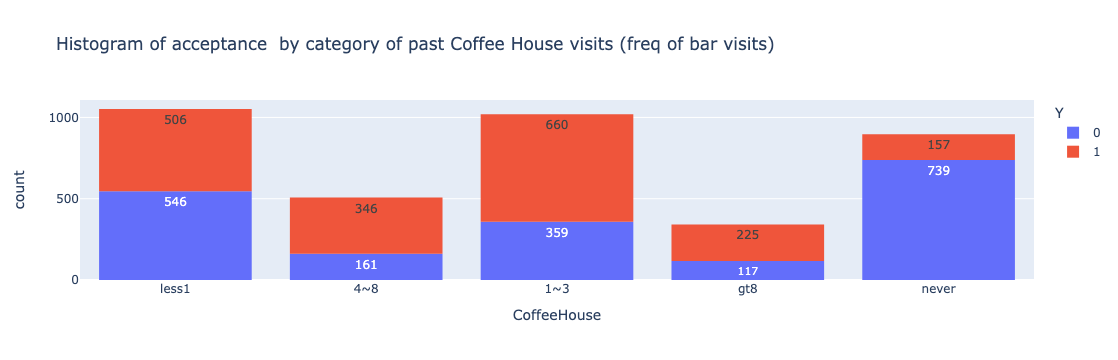

In [77]:
fig = px.histogram(data_clean_coffeehouse, x="CoffeeHouse", y="Y", color="Y", histfunc = 'count', text_auto=True, title = "Histogram of acceptance  by category of past Coffee House visits (freq of bar visits)")
fig.show()

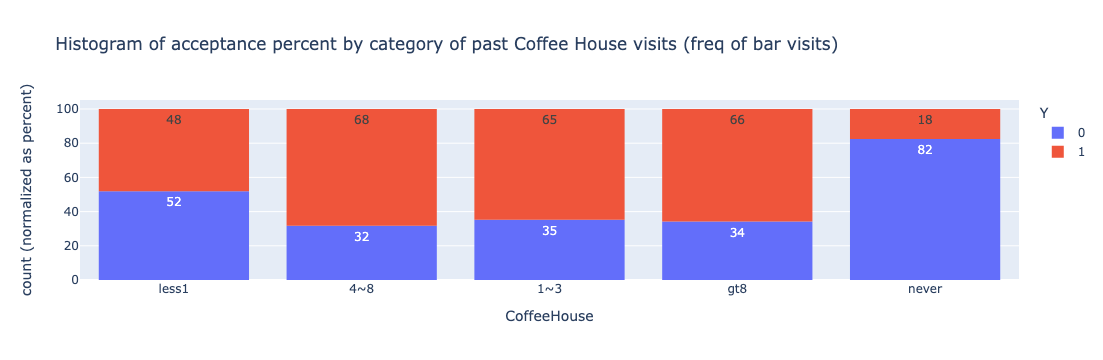

In [78]:
fig = px.histogram(data_clean_coffeehouse, x="CoffeeHouse", y="Y", color="Y", barnorm='percent', histfunc = 'count', text_auto='0.2F', title = "Histogram of acceptance percent by category of past Coffee House visits (freq of bar visits)")
fig.show()

In [79]:
#count of acceptances for participants who went to coffeehouse less than 1 time
cnt_accept_cofhse_novisit =  data_clean_coffeehouse.query("CoffeeHouse == ['less1','never']")["Y"].sum()
print("count of acceptances for participants who went to coffeehouse less than 1 time : ", cnt_accept_cofhse_novisit)

#total number of participants who went to coffeehouse less than 1 time
total_part_cofhse_novisit = data_clean_coffeehouse.query("CoffeeHouse == ['less1','never']").shape[0]
print("Total number of participants who went to coffeehouse less than 1 time : ", total_part_cofhse_novisit)

#count of acceptances for participants who went to coffeehouse 1 or more time
cnt_accept_cofhse_more_than_1x =  data_clean_coffeehouse.query("CoffeeHouse == ['1~3','4~8','gt8']")["Y"].sum()
print("count of acceptances for participants who went to coffeehouse 1 or more time : ", cnt_accept_cofhse_more_than_1x)

#total number of participants who went to coffeehouse 1 or more time
total_part_cofhse_more_than_1x = data_clean_coffeehouse.query("CoffeeHouse == ['1~3','4~8','gt8']").shape[0]
print("Total number of participants who went to coffeehouse 1 or more time : ", total_part_cofhse_more_than_1x)

# acceptance rate for  participants who went to coffeehouse less than 1 time
accept_rate_cofhse_novisit = (cnt_accept_cofhse_novisit/total_part_cofhse_novisit) * 100
print("Acceptance rate for those who went to a coffeehouse less than 1 time : ",round(accept_rate_cofhse_novisit,2), "%" )

# acceptance rate for  participants who went to coffeehouse 1 or more time
accept_rate_cofhse_more_than_1x = (cnt_accept_cofhse_more_than_1x/total_part_cofhse_more_than_1x) * 100
print("Acceptance rate for those who went to a coffeehouse 1 or more time : ",round(accept_rate_cofhse_more_than_1x,2), "%" )

count of acceptances for participants who went to coffeehouse less than 1 time :  663
Total number of participants who went to coffeehouse less than 1 time :  1948
count of acceptances for participants who went to coffeehouse 1 or more time :  1231
Total number of participants who went to coffeehouse 1 or more time :  1868
Acceptance rate for those who went to a coffeehouse less than 1 time :  34.03 %
Acceptance rate for those who went to a coffeehouse 1 or more time :  65.9 %


In [80]:
#TAKEAWAY : Participants who have visited coffeehouse atleast 1 time in the past have higher acceptance rate for coffeee house coupon

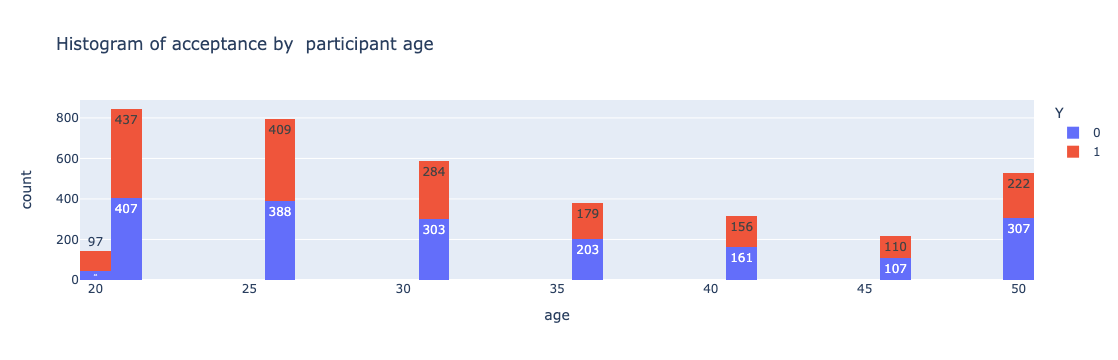

In [81]:
fig = px.histogram(data_clean_coffeehouse, x="age", y="Y", color="Y", histfunc = 'count', text_auto=True, title = "Histogram of acceptance by  participant age")
fig.show()

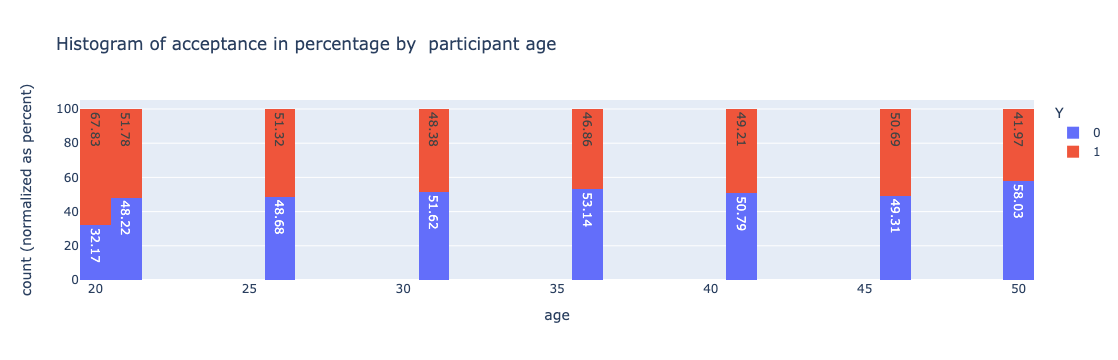

In [82]:
fig = px.histogram(data_clean_coffeehouse, x="age", y="Y", color="Y", barnorm='percent', histfunc = 'count', text_auto='.2f', title = "Histogram of acceptance in percentage by  participant age")
fig.show()

In [83]:

#TAKEAWAY : Age does not seem to influence acceptance rate for coffeehouse coupons. Most age group acceptance is closer to average (50%)
# for age group 50 and above, acceptance is slightly lower than average and for age group 20 and lower it is higer than average although
# sample size is small to derive inferences for this age group

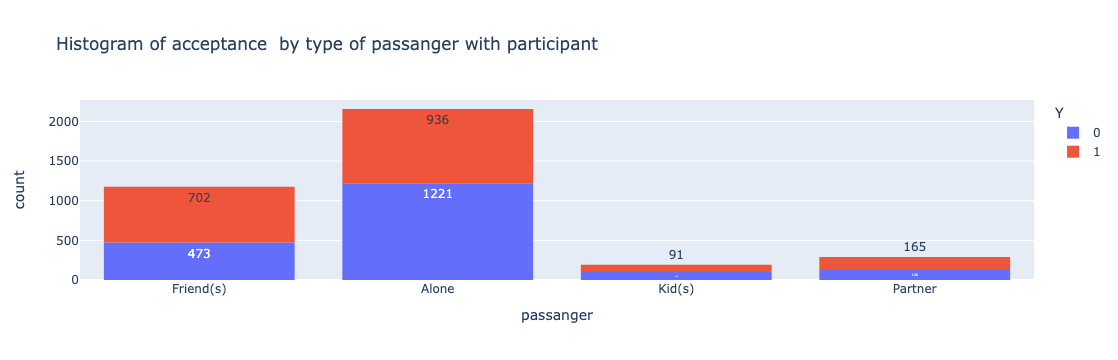

In [84]:
fig = px.histogram(data_clean_coffeehouse, x="passanger", y="Y", color="Y",  histfunc = 'count', text_auto=True, title = "Histogram of acceptance  by type of passanger with participant")
fig.show()

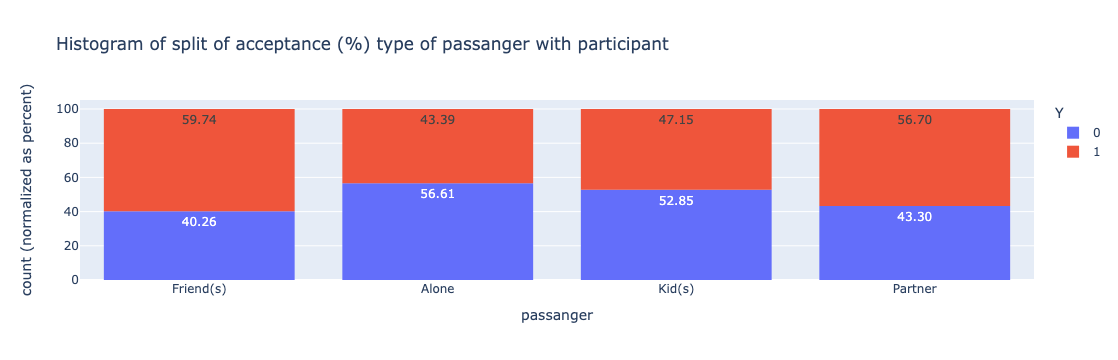

In [85]:
fig = px.histogram(data_clean_coffeehouse, x="passanger", y="Y", color="Y", barnorm='percent', histfunc = 'count', text_auto='.2f', title = "Histogram of split of acceptance (%) type of passanger with participant")
fig.show()

In [86]:
#count of acceptances for participants who travelled with friends and partner
cnt_accept_cofhse_withFnP =  data_clean_coffeehouse.query("passanger == ['Friend(s)','Partner']")["Y"].sum()
print("count of acceptances for participants who travelled with friends and partner : ", cnt_accept_cofhse_withFnP)

#total number of participants who travelled with friends and partner
total_part_cofhse_withFn = data_clean_coffeehouse.query("passanger == ['Friend(s)','Partner']").shape[0]
print("Total number of participants who travelled with friends and partner : ", total_part_cofhse_withFn)


# acceptance rate for  participants who travelled with friends and partner
accept_rate_cofhse_withFn = (cnt_accept_cofhse_withFnP/total_part_cofhse_withFn) * 100
print("Acceptance rate for participants who travelled with friends and partner : ",round(accept_rate_cofhse_withFn,2), "%" )

count of acceptances for participants who travelled with friends and partner :  867
Total number of participants who travelled with friends and partner :  1466
Acceptance rate for participants who travelled with friends and partner :  59.14 %


In [87]:
#TAKEAWAY : Partcipants travelling with friends and partners have a higger percentage of acceptance

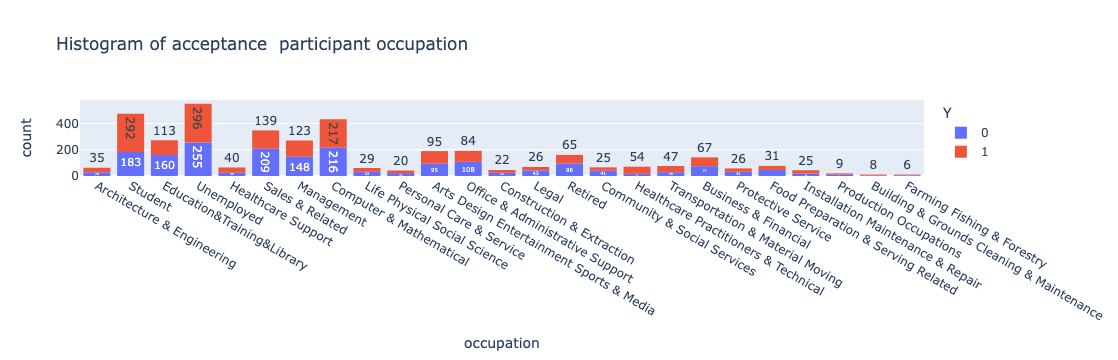

In [88]:
fig = px.histogram(data_clean_coffeehouse, x="occupation", y="Y", color="Y", histfunc = 'count', text_auto=True, title = "Histogram of acceptance  participant occupation")
fig.show()

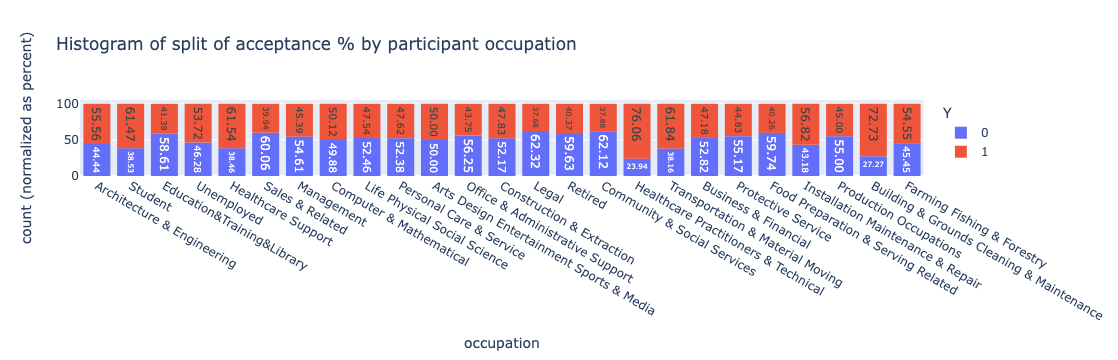

In [89]:
fig = px.histogram(data_clean_coffeehouse, x="occupation", y="Y", color="Y", barnorm='percent', histfunc = 'count', text_auto='.2f', title = "Histogram of split of acceptance % by participant occupation")
fig.show()

In [90]:
#TAKEAWAY : Partcipants with occupations student, Heatlcare suppor, Healthcare practitioners & Technical, Buildings & grounds cleaning
# have higher percentage acceptance but their sample size is small to make inferences

In [91]:
data_clean_coffeehouse['toCoupon_GEQ5min'].value_counts()

toCoupon_GEQ5min
1    3816
Name: count, dtype: int64

In [92]:
data_clean_coffeehouse['toCoupon_GEQ15min'].value_counts()

toCoupon_GEQ15min
1    1982
0    1834
Name: count, dtype: int64

In [93]:
data_clean_coffeehouse['toCoupon_GEQ25min'].value_counts()

toCoupon_GEQ25min
0    3518
1     298
Name: count, dtype: int64

In [94]:
data_clean_coffeehouse['direction_same'].value_counts()

direction_same
0    3100
1     716
Name: count, dtype: int64

In [95]:
data_clean_coffeehouse['direction_opp'].value_counts()

direction_opp
1    3100
0     716
Name: count, dtype: int64

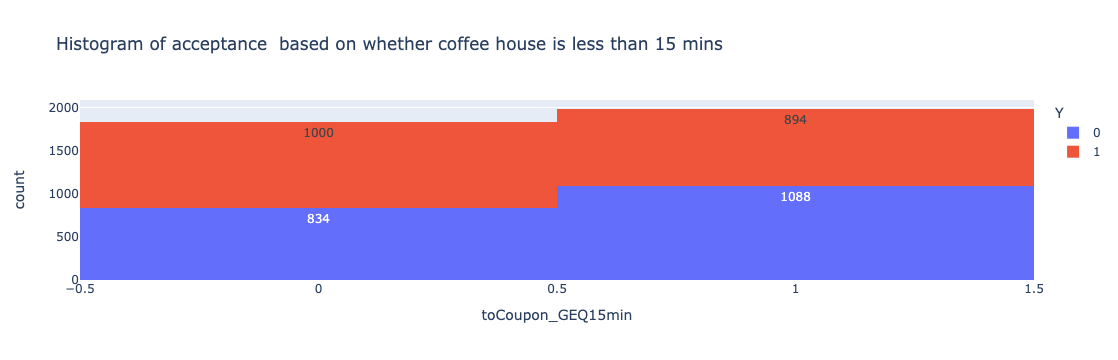

In [96]:
fig = px.histogram(data_clean_coffeehouse, x="toCoupon_GEQ15min", y="Y", color="Y", histfunc = 'count', text_auto=True, title = "Histogram of acceptance  based on whether coffee house is less than 15 mins")
fig.show()

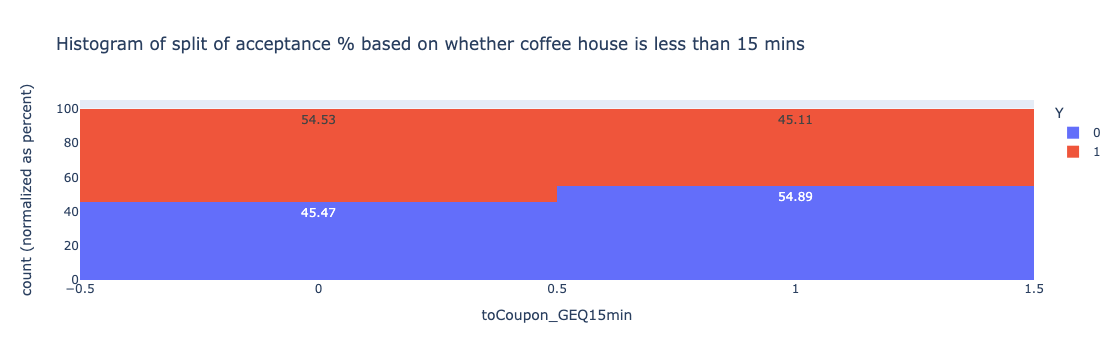

In [97]:
fig = px.histogram(data_clean_coffeehouse, x="toCoupon_GEQ15min", y="Y", color="Y", barnorm='percent', histfunc = 'count', text_auto='.2f', title = "Histogram of split of acceptance % based on whether coffee house is less than 15 mins")
fig.show()

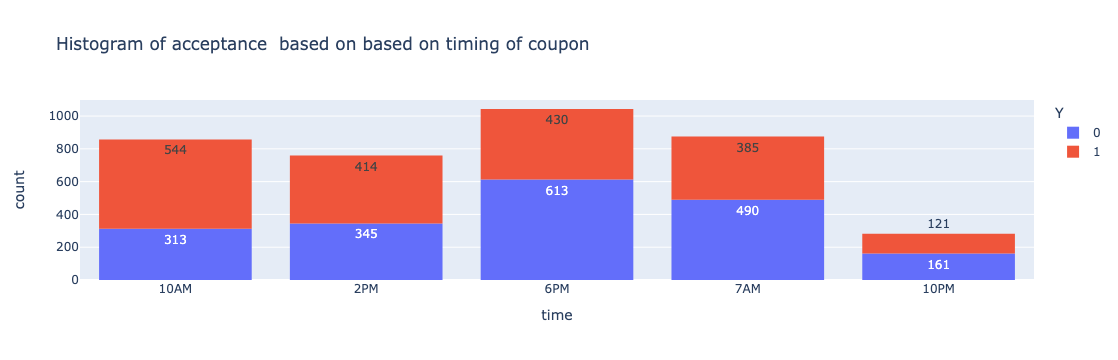

In [98]:
fig = px.histogram(data_clean_coffeehouse, x="time", y="Y", color="Y", histfunc = 'count', text_auto=True, title = "Histogram of acceptance  based on based on timing of coupon")
fig.show()

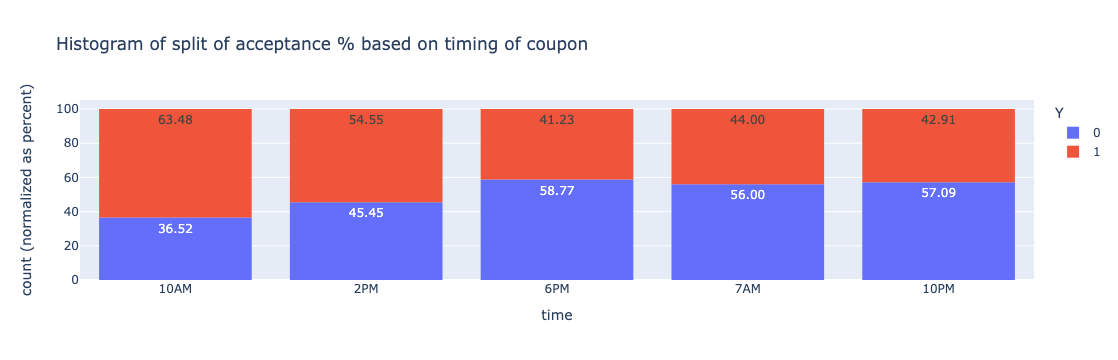

In [99]:
fig = px.histogram(data_clean_coffeehouse, x="time", y="Y", color="Y", barnorm='percent', histfunc = 'count', text_auto='.2f', title = "Histogram of split of acceptance % based on timing of coupon")
fig.show()

In [100]:
#TAKEAWAY : Coupons sent aroud the breakfast (10AM) and lunch (2PM) has higher acceptance rate than others

In [101]:
data_clean_baronly['income'].value_counts()

income
$25000 - $37499     300
$100000 or More     282
$12500 - $24999     271
$50000 - $62499     249
$37500 - $49999     247
Less than $12500    159
$75000 - $87499     143
$87500 - $99999     133
$62500 - $74999     129
Name: count, dtype: int64

In [102]:
#percentage acceptance rate by income levels
print(round((data_clean_coffeehouse.groupby('income')["Y"].sum()/data_clean_coffeehouse.groupby('income')["Y"].count())*100,2))

income
$100000 or More     48.95
$12500 - $24999     55.22
$25000 - $37499     46.52
$37500 - $49999     54.74
$50000 - $62499     49.80
$62500 - $74999     43.54
$75000 - $87499     29.82
$87500 - $99999     53.94
Less than $12500    54.03
Name: Y, dtype: float64


In [103]:
#TAKEAWAY :  income levels doesnt appear to have a major influence on bar coupon acceptance 
#(acceptance level close to the average for the bar coupon acceptance which is 50%)
#exception s income $75000 - $87499 which has low acceptance (29%). 143 out of 3816  is a small sample size to derive inferences

**_Analysis & Takeaways_**

For coffee House coupons (sample of 3816 coupons), I analysed the following attributes to assess the propensity of accepting the coupons 
* **User Attributes** - Age, Marital status, Occupation, Income, how frequently visited coffee houses in the past
* **Contextual attributes** - Type of passesnger with the driver, timing of the coupon

**Considering some of the attributes independently** (without considering the impact of other factors jointly ), some of these attributes increases chances of accepting the coffee house coupons
* **number of times driver has visited bar in the past** : participants who visited coffee house in the past atleast once have a higher percentage of acceptance
* **Type of passenger** : Partcipants travelling with friends and partners have a higger percentage of acceptance
* **Timing** : Coupons sent aroud the breakfast 10AM and lunch 2PM has higher acceptance rate than others

Following attributes, **did not appear to influence the chances of acceptance of coffee house coupons**
* **Occupation** : Partcipants with occupations student, Heatlcare suppor, Healthcare practitioners & Technical, Buildings & grounds cleaning
have higher percentage acceptance but their sample size is small to make inferences
* **Income** : income levels doesnt appear to have a major influence on bar coupon acceptance 
* **Age of the drive** :  Age does not seem to influence acceptance rate for coffeehouse coupons. 
Most age group acceptance is closer to average (50%) for age group 50 and above, acceptance is slightly lower 
than average and for age group 20 and lower it is higer than average although sample size is small to derive inferences for this age group

Some of the factors may be correlated and further analysis is needed to determine if some of these factors in combination have a greater impact on the acceptance rate for coffee house coupons

